In [1]:
from scipy import integrate as inte

import numpy as np
import numpy.ma as ma

import matplotlib.pyplot as plt
%matplotlib notebook

from scipy.special import kn, iv

import sys
sys.path.insert(1, '/Users/kellydouglass/Documents/Research/Rotation_curves/Yifan_Zhang/RotationCurve/2D_RC/main/')

In [2]:
G = 6.674E-11  # m^3 kg^-1 s^-2
Msun = 1.989E30  # kg

gamma = 3.3308
kappa = gamma * np.log(10)

In [3]:
r = np.linspace(1e-10,30,1000)

# de Vaucouleur bulge

In [9]:
from galaxy_component_functions import bulge_vel_deV

In [10]:
dv_vcir = bulge_vel_deV(r*1000, 3.2E3, 0.5E3)

/Users/kellydouglass/Documents/Research/Rotation_curves/Yifan_Zhang/RotationCurve/2D_RC/main/galaxy_component_functions.py:132: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  vol_den, vol_den_err = inte.quad(deV_integrand, r, np.inf, args=(r,SigBC,Rb))
/Users/kellydouglass/Documents/Research/Rotation_curves/Yifan_Zhang/RotationCurve/2D_RC/main/galaxy_component_functions.py:132: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  vol_den, vol_den_err = inte.quad(deV_integrand, r, np.inf, args=(r,SigBC,Rb))
/Users/kellydouglass/Documents/Research/Rotation_curves/Yifan_Zhang/RotationCurve/2D_RC/main/galaxy_component_functions.py:132: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields n

KeyboardInterrupt: 

In [5]:
plt.plot(r, dv_vcir)
plt.xlabel('$r [kpc]$')
plt.ylabel('$V_{cir}$ [km/s]')
plt.title('MW Bulge [de Vaucouleur]');

/var/folders/5x/2533z9ns34n_8ghxd5f6hl0c0000gn/T/ipykernel_36159/1462821413.py:16: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  vol_den, vol_den_err = inte.quad(density_integrand, r, np.inf, args=(r, SigBE, Rb))
/var/folders/5x/2533z9ns34n_8ghxd5f6hl0c0000gn/T/ipykernel_36159/1462821413.py:16: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  vol_den, vol_den_err = inte.quad(density_integrand, r, np.inf, args=(r, SigBE, Rb))
/var/folders/5x/2533z9ns34n_8ghxd5f6hl0c0000gn/T/ipykernel_36159/1462821413.py:27: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  bulge_mass[i],err[i] = inte.quad(mass_integrand, 0, r[i], args=(SigB

KeyboardInterrupt: 

# Exponential bulge (from Feng 2014)

**Note:** This model should not be used with the traditional disk model, as it reaches a maximum at a much larger radius than is typically assumed.

In [ ]:
from galaxy_component_functions_cython import bulge_vel_feng_2014 as exp_vel_F14

Feng14 = np.zeros(len(r))

for i in range(len(r)):
    Feng14[i] = exp_vel_F14(r[i]*1000, np.log10(26), 0.5*1000)

Text(0.5, 1.0, 'MW Bulge [Solid sphere]')

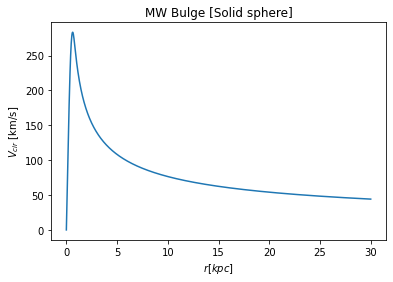

In [8]:
plt.plot(r, Feng14)
plt.xlabel('$r [kpc]$')
plt.ylabel('$V_{cir}$ [km/s]')
plt.title('MW Bulge [Solid sphere]');

# Compare

Text(0.5, 1.0, 'de Vauc vs Feng')

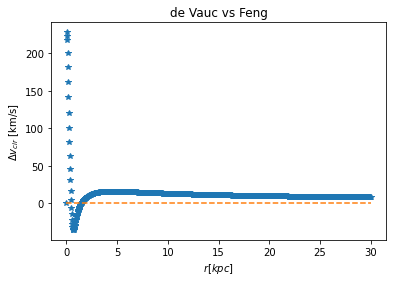

In [5]:
delta_v = dv_vcir - bulge_vel(r*1000, 25, 0.5*1000)
    
plt.plot(r, delta_v)
plt.hlines(0, 0, 30, linestyles='dashed')
plt.xlabel('$r [kpc]$')
plt.ylabel('$\Delta v_{cir}$ [km/s]')
plt.title('de Vauc - Feng');

Text(0.5, 1.0, 'MW Bulge [modified Di Paolo]')

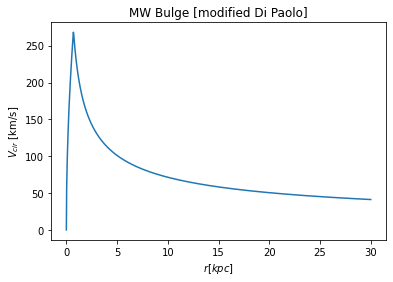

In [6]:
def bulge_vel_mod(r, A, Vin, Rd):
    if isinstance(r, float):
        if r < 0.2 * Rd:
            v = np.sqrt(A*Vin**2*r/(0.2*Rd))
        else:
            v = np.sqrt(A * Vin **2 * (r/(0.2*Rd)) ** -1)
    else:
        v = np.zeros(len(r))
        for i in range(len(r)):
            if r[i] < 0.2 * Rd:
                v[i] = np.sqrt(A*Vin**2*r[i]/(0.2*Rd))
            else:
                v[i] = np.sqrt(A * Vin **2 * (r[i]/(0.2*Rd)) ** -1)
    return v

plt.plot(r,bulge_vel_mod(r*1000,1,270,3500))
plt.xlabel('$r [kpc]$')
plt.ylabel('$V_{cir}$ [km/s]')
plt.title('MW Bulge [modified Di Paolo]');

Text(0.5, 1.0, 'Feng vs Modified Di Paolo')

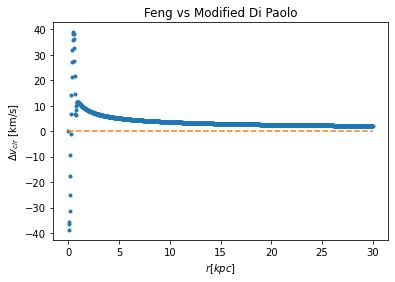

In [10]:
delta_v = np.zeros(len(r))
zero_line = np.zeros(len(r))
for i in range(len(r)):
    delta_v[i] = bulge_vel(r[i]*1000,25,0.5*1000) - bulge_vel_mod(r[i]*1000,1,270,3500)
    
plt.plot(r, delta_v,'.')
plt.plot(r, zero_line, '--')
plt.xlabel('$r [kpc]$')
plt.ylabel('$\Delta v_{cir}$ [km/s]')
plt.title('Feng vs Modified Di Paolo')

# Exponential bulge (from Sofue 2017)

In [4]:
from galaxy_component_functions_cython import bulge_vel as exp_vel_S17

In [5]:
Sofue17 = np.zeros(len(r))

ab = 1.5 # kpc
Mb = 2.3e10 # Msun

rho_b = Mb/(8 * np.pi * (ab*1000)**3)

for i in range(len(r)):
    Sofue17[i] = exp_vel_S17(r[i]*1000, np.log10(rho_b), ab*1000)

<IPython.core.display.Javascript object>


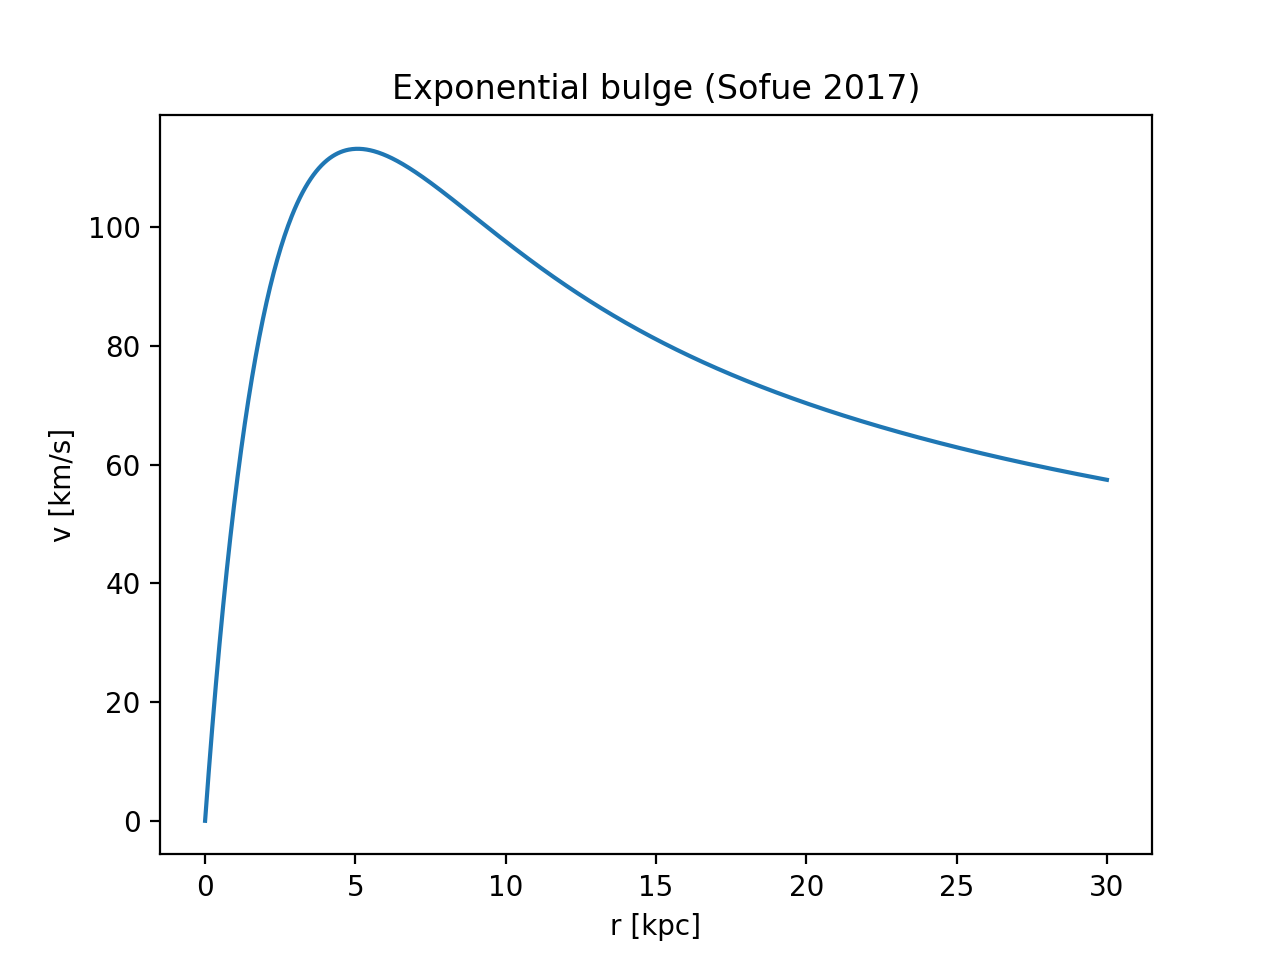

In [6]:
plt.figure()

plt.plot(r, Sofue17)

plt.xlabel('r [kpc]')
plt.ylabel('v [km/s]')

plt.title('Exponential bulge (Sofue 2017)');